# Analysis of sold new cars in Estonia 2023

Data is taken from official source - https://www.transpordiamet.ee/soidukitega-tehtud-toimingute-statistika

Only new cars where used in this analysis.


## Initial data

In [1]:
%reload_ext autoreload
%autoreload 0

import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mnt_sum import get_summary, COLUMNS, PRIVATE_CUSTOMER, COLUMN_SHORT_NAME, COLUMN_CUSTOMER, COLUMN_CITY
df_o = get_summary('data/2023')
df_o.describe()

,Esm reg aasta,Mootori võimsus,Mootori maht,CO2_NEDC,CO2_WLTP,Istekohti,Telgi kokku,Registrimass,Tühimass,Täismass,Arv
count,2678.0,2678.000000,2678.000000,534.000000,2579.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000
mean,2023.0,124.925504,1752.434653,131.485019,148.528112,5.160941,2.000373,2181.146004,1710.043689,2181.146004,1.273338
std,0.0,62.536303,741.869028,56.121173,48.503960,0.698372,0.019324,457.551007,402.949481,457.551007,2.107489
min,2023.0,45.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1260.000000,1004.000000,1260.000000,1.000000
25%,2023.0,91.900000,1482.000000,113.000000,124.000000,5.000000,2.000000,1860.000000,1428.250000,1860.000000,1.000000
50%,2023.0,110.000000,1598.000000,130.500000,140.000000,5.000000,2.000000,2070.000000,1606.500000,2070.000000,1.000000
75%,2023.0,132.400000,1991.000000,155.000000,166.000000,5.000000,2.000000,2400.000000,1881.500000,2400.000000,1.000000
max,2023.0,585.000000,6496.000000,345.000000,394.000000,9.000000,3.000000,5500.000000,4359.000000,5500.000000,50.000000


In [3]:
df_o.head()

,Kategooria,Mark,Mudel,Tüüp,Kere nimetus,Keretüüp,Esm reg aasta,Kütusekombinatsioon,Mootori tüüp,Mootori võimsus,...,Tühimass,Täismass,Värv,Käigukasti tüüp,Maakond,Linn,Tüüp (isik),Arv,name,short name
107,M1,AUDI,A3 LIMOUSINE,GY,SEDAAN,AA,2023,BENSIIN-ELEKTER,BENSIIN_HYBRIID,110.0,...,1459,1880,MUST,AUTOMAAT,HARJU MAAKOND,Tallinn,FÜÜSILINE,1,AUDI A3 LIMOUSINE,AUDI A3
108,M1,AUDI,A3 SPORTBACK,GY,LUUKPÄRA,AB,2023,BENSIIN,BENSIIN_KATALYSAATOR,140.0,...,1575,2000,SININE,AUTOMAAT,HARJU MAAKOND,Tallinn,JURIIDILINE,1,AUDI A3 SPORTBACK,AUDI A3
109,M1,AUDI,A3 SPORTBACK,GY,LUUKPÄRA,AB,2023,BENSIIN-ELEKTER,BENSIIN_HYBRIID,81.0,...,1370,1835,VALGE,AUTOMAAT,HARJU MAAKOND,Tallinn,JURIIDILINE,4,AUDI A3 SPORTBACK,AUDI A3
110,M1,AUDI,A4 LIMOUSINE,B8,SEDAAN,AA,2023,BENSIIN-ELEKTER,BENSIIN_HYBRIID,110.0,...,1620,2040,HALL,AUTOMAAT,HARJU MAAKOND,Tallinn,JURIIDILINE,8,AUDI A4 LIMOUSINE,AUDI A4
111,M1,AUDI,A4 LIMOUSINE,B8,SEDAAN,AA,2023,BENSIIN-ELEKTER,BENSIIN_HYBRIID,110.0,...,1620,2040,MUST,AUTOMAAT,HARJU MAAKOND,Tallinn,JURIIDILINE,2,AUDI A4 LIMOUSINE,AUDI A4


In [4]:
df = df_o[COLUMNS]

df.head()

,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp (isik),Arv,Värv
107,AUDI,A3 LIMOUSINE,AUDI A3,BENSIIN_HYBRIID,1498,110.0,Tallinn,FÜÜSILINE,1,MUST
108,AUDI,A3 SPORTBACK,AUDI A3,BENSIIN_KATALYSAATOR,1984,140.0,Tallinn,JURIIDILINE,1,SININE
109,AUDI,A3 SPORTBACK,AUDI A3,BENSIIN_HYBRIID,999,81.0,Tallinn,JURIIDILINE,4,VALGE
110,AUDI,A4 LIMOUSINE,AUDI A4,BENSIIN_HYBRIID,1984,110.0,Tallinn,JURIIDILINE,8,HALL
111,AUDI,A4 LIMOUSINE,AUDI A4,BENSIIN_HYBRIID,1984,110.0,Tallinn,JURIIDILINE,2,MUST


## Add additional data

In [5]:
import yaml
from utils.file import read_file

SUVS = set(yaml.safe_load(read_file("data/suvs.yaml").lower()))

df['SUV'] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)
df[df['SUV']].head(5)

/tmp/ipykernel_271554/968145016.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SUV'] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)


,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp (isik),Arv,Värv,SUV
126,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,Määramata,JURIIDILINE,1,MUST,True
127,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,Tallinn,JURIIDILINE,1,TUMEPRUUN,True
128,AUDI,E-TRON SPORTBACK 55,AUDI E-TRON,ELEKTER,0,158.0,Tallinn,FÜÜSILINE,1,VALGE,True
129,AUDI,E-TRON SPORTBACK 55,AUDI E-TRON,ELEKTER,0,158.0,Narva,FÜÜSILINE,1,VALGE,True
130,AUDI,E-TRON SPORTBACK 55,AUDI E-TRON,ELEKTER,0,158.0,Määramata,JURIIDILINE,1,MUST,True


# Total sold cars

In [6]:
df['Arv'].sum()

3410

# Popular fuels

                       Arv
Mootori tüüp              
BENSIIN_HYBRIID       1317
BENSIIN_KATALYSAATOR  1277
DIISEL                 438
DIISEL_HYBRIID         227
ELEKTER                135
CNG                     12
BENSIIN                  4


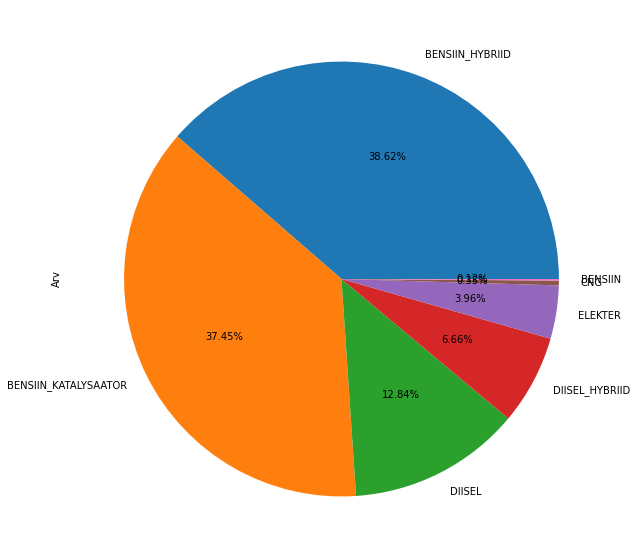

In [7]:
def show_pie(dataframe, groupby, index = None):
    plt.figure(figsize=(10, 10))
    dataframe = dataframe.groupby(
        [groupby], 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)
    if index:
        dataframe.index = index
    else:
        dataframe = dataframe.set_index(groupby)
    dataframe['Arv'].plot.pie(autopct='%1.2f%%')
    print(dataframe)

show_pie(df, 'Mootori tüüp')

# Popular colors

              Arv
Värv             
HALL          991
MUST          647
VALGE         531
SININE        282
PUNANE        214
HÕBEDANE      142
ROHELINE      141
TUMEHALL      133
ORANŽ          69
PRUUN          67
KOLLANE        42
BEEŽ           42
TUMESININE     31
TUMEPUNANE     16
KULDNE         14
LILLA          13
HELEHALL       10
HELESININE      6
HELEROHELINE    6
TUMEPRUUN       5
TUMEROHELINE    3
HELEPRUUN       2
HELEBEEŽ        2
TUMEKOLLANE     1


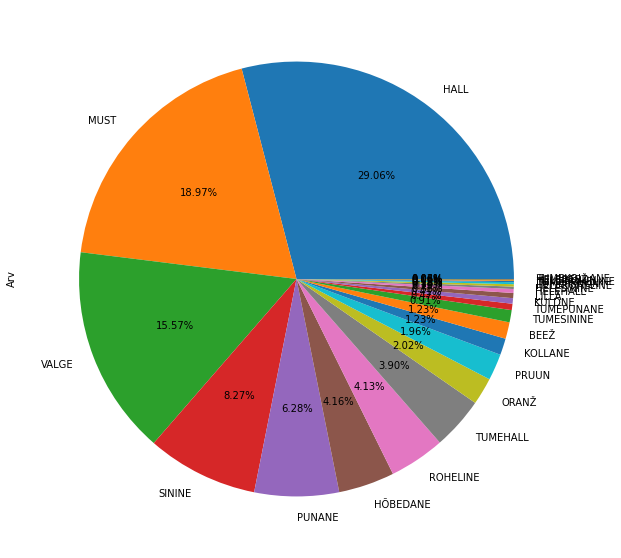

In [8]:
show_pie(df, 'Värv')

# Engine capacities

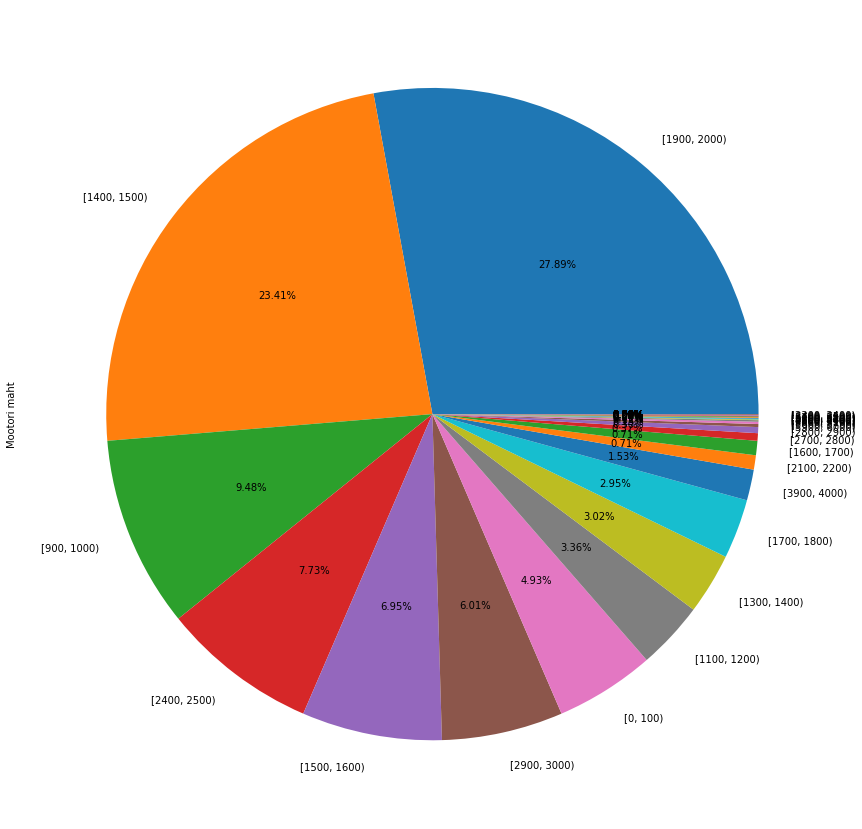

In [9]:
plt.figure(figsize=(15, 15))

bins = range(df['Mootori maht'].min(), df['Mootori maht'].max() + 100, 100)
capacities = pd.cut(df['Mootori maht'], bins, right=False).value_counts()
capacities.plot(kind='pie', autopct='%1.2f%%')
pass

# Top 10 popular manufacturers

             Mark  Arv
1          TOYOTA  617
2           SKODA  494
3            AUDI  474
4             KIA  249
5         PEUGEOT  170
6      VOLKSWAGEN  158
7   MERCEDES-BENZ  141
8           DACIA  139
9          SUBARU  138
10        RENAULT   86


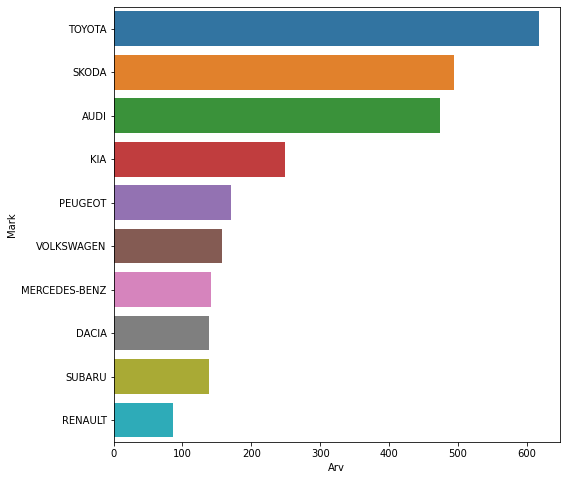

In [10]:
LIMIT = 10

def group_and_sort(data_frame, selection):
    return data_frame.groupby(
        selection, 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)

def group_sort_and_plot(data_frame, selection, x='Arv', y=None, limit=LIMIT, plot=True):
    data = group_and_sort(data_frame, selection)
    data.index += 1 
    y = selection[0] if y is None else y
    if plot:
        plt.figure(figsize=(8, 8))
        sns.barplot(x=x, y=y, data=data[:limit], orient='h')
    print(data.head(limit))
    
group_sort_and_plot(df, ['Mark'])

## Top 10 popular car models

            short name  Arv
1       TOYOTA COROLLA  181
2        SKODA OCTAVIA  165
3          TOYOTA RAV4  154
4              AUDI Q2  144
5   TOYOTA YARIS CROSS  131
6              AUDI A4  103
7              AUDI A5   99
8         SKODA KODIAQ   91
9       SUBARU OUTBACK   88
10        KIA SPORTAGE   86


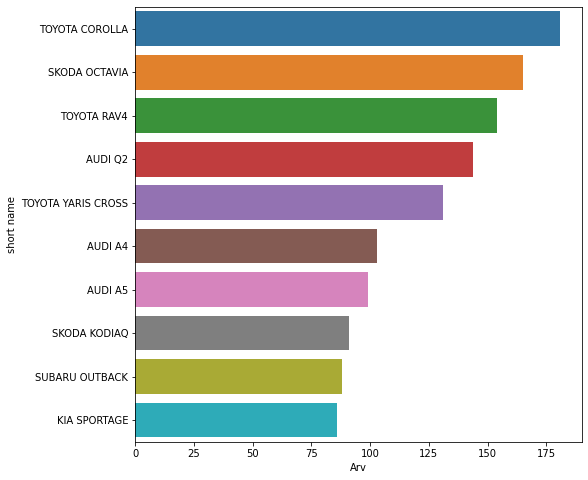

In [11]:
group_sort_and_plot(df, [COLUMN_SHORT_NAME])

### Top 10 popular diesel models

                          short name  Arv
1                       SKODA KODIAQ   54
2                       DACIA DUSTER   46
3                      SKODA OCTAVIA   34
4             MERCEDES-BENZ V-KLASSE   27
5                       PEUGEOT 3008   25
6                  VOLKSWAGEN TIGUAN   16
7                      TOYOTA PROACE   12
8                     RENAULT TRAFIC   11
9              RENAULT/CARPOL TRAFIC   11
10  TOYOTA LAND CRUISER (150 SERIES)   11


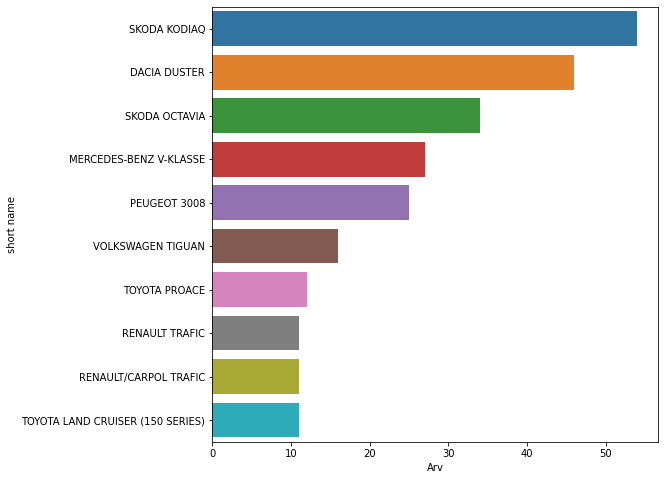

In [12]:
df_diesel = df[df['Mootori tüüp'] == 'DIISEL']

group_sort_and_plot(df_diesel, [COLUMN_SHORT_NAME])

### Top 10 popular petrol models

        short name  Arv
1          AUDI Q2  139
2   SUBARU OUTBACK   88
3      SKODA KAMIQ   73
4      TOYOTA RAV4   72
5     PEUGEOT 2008   64
6         KIA CEED   50
7      SKODA KAROQ   50
8    DACIA SANDERO   41
9      SKODA FABIA   40
10     PEUGEOT 208   38


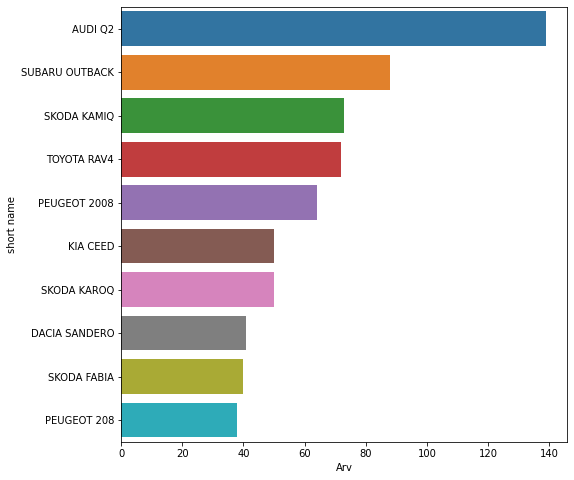

In [13]:
df_petrol = df[df['Mootori tüüp'].isin(['BENSIIN_KATALYSAATOR', 'BENSIIN'])]

group_sort_and_plot(df_petrol, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid models(diesel and petrol)


            short name  Arv
1       TOYOTA COROLLA  162
2   TOYOTA YARIS CROSS  122
3        SKODA OCTAVIA  109
4              AUDI A4  102
5              AUDI A5   97
6          TOYOTA RAV4   82
7         KIA SPORTAGE   66
8           HONDA CR-V   50
9          TOYOTA C-HR   40
10        TOYOTA YARIS   37


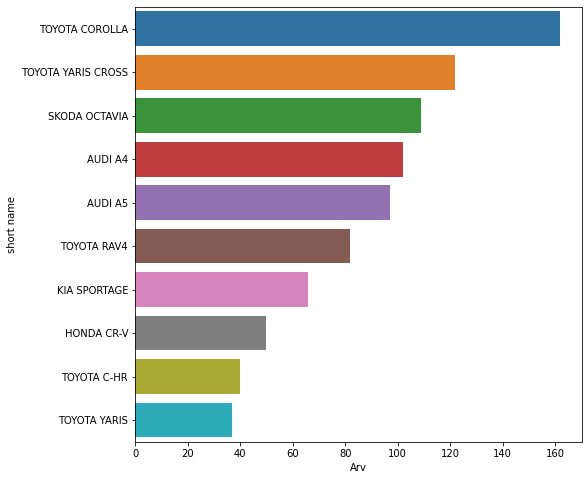

In [14]:
df_hybrids = df[df['Mootori tüüp'].apply(lambda x: 'HYBRIID' in x)]

group_sort_and_plot(df_hybrids, [COLUMN_SHORT_NAME])

### Top 10 popular electric models

           short name  Arv
1         SKODA ENYAQ   18
2         AUDI E-TRON   16
3              BMW IX    9
4       TESLA MODEL Y    9
5         NISSAN LEAF    8
6      PORSCHE TAYCAN    7
7             KIA EV6    6
8     SUBARU SOLTERRA    6
9   MERCEDES-BENZ EQS    6
10     VOLKSWAGEN ID.    5


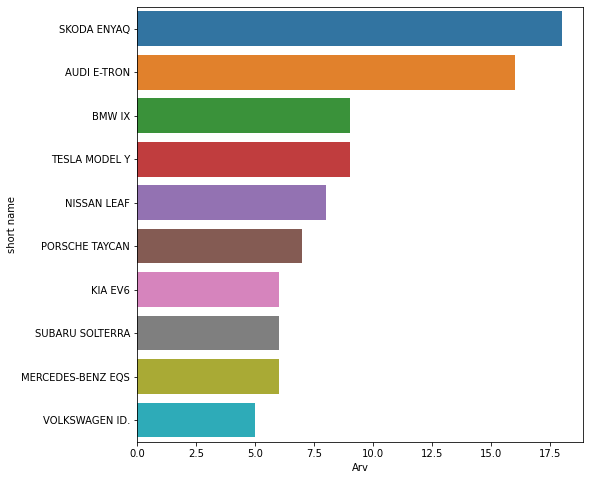

In [15]:
df_electric = df[df['Mootori tüüp'] == 'ELEKTER']

group_sort_and_plot(df_electric, [COLUMN_SHORT_NAME])

### Top 10 popular cars by private owners

            short name  Arv
1       TOYOTA COROLLA   91
2          TOYOTA RAV4   88
3   TOYOTA YARIS CROSS   72
4       SUBARU OUTBACK   54
5         KIA SPORTAGE   52
6          SKODA KAMIQ   50
7        SKODA OCTAVIA   48
8         SKODA KODIAQ   39
9         DACIA DUSTER   37
10          HONDA CR-V   34


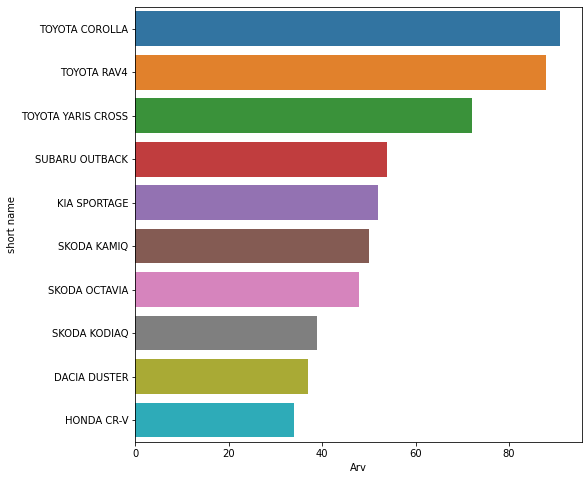

In [16]:
df_private = df[df[COLUMN_CUSTOMER].apply(lambda x: PRIVATE_CUSTOMER in x)]

group_sort_and_plot(df_private, [COLUMN_SHORT_NAME])

### Top 10 popular cars by company owners

            short name  Arv
1              AUDI Q2  140
2        SKODA OCTAVIA  117
3              AUDI A4  103
4              AUDI A5   98
5       TOYOTA COROLLA   90
6         PEUGEOT 2008   67
7          TOYOTA RAV4   66
8   TOYOTA YARIS CROSS   59
9         SKODA KODIAQ   52
10        TOYOTA YARIS   41


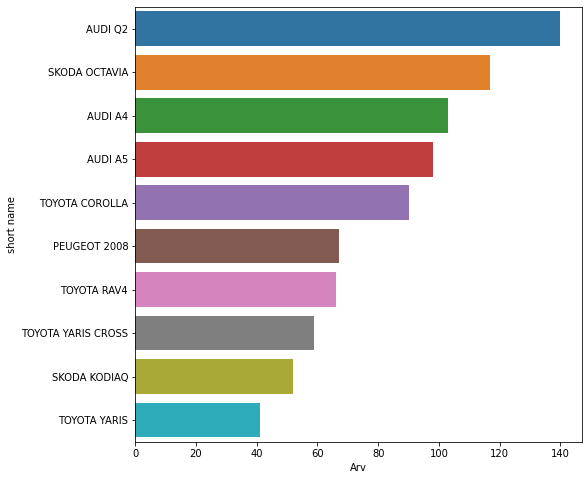

In [17]:
df_corporate = df[df[COLUMN_CUSTOMER].apply(lambda x: PRIVATE_CUSTOMER not in x)]

group_sort_and_plot(df_corporate, [COLUMN_SHORT_NAME])

### SUV vs non SUV

           SUV   Arv
non-SUV  False  1783
SUV       True  1627


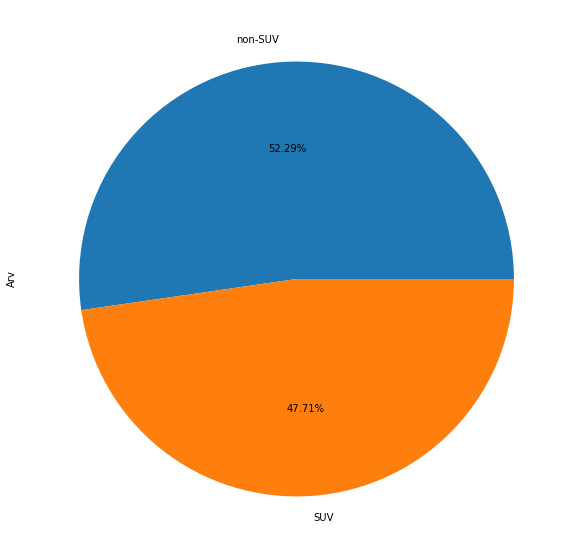

In [18]:
show_pie(df, 'SUV', index=['non-SUV', 'SUV'])

### Popular fuels in SUV

                      Arv
Mootori tüüp             
BENSIIN_KATALYSAATOR  657
BENSIIN_HYBRIID       596
DIISEL                209
DIISEL_HYBRIID        114
ELEKTER                51


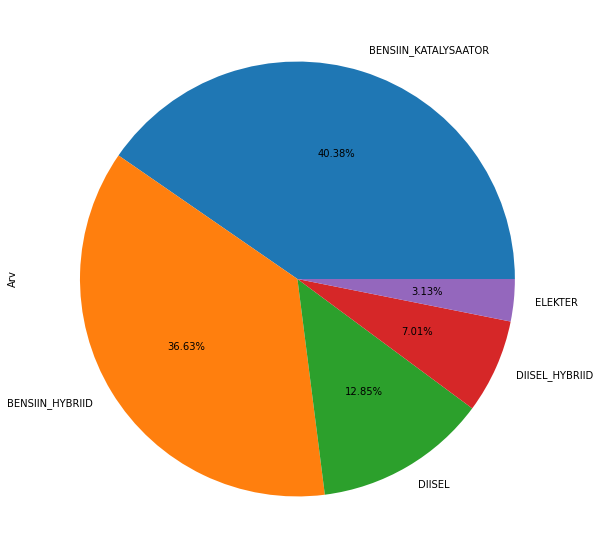

In [19]:
df_suv = df[df['SUV']]

show_pie(df_suv, 'Mootori tüüp')

### Top 10 popular SUV

            short name  Arv
1          TOYOTA RAV4  154
2              AUDI Q2  144
3   TOYOTA YARIS CROSS  131
4         SKODA KODIAQ   91
5         KIA SPORTAGE   86
6         DACIA DUSTER   77
7          SKODA KAMIQ   73
8         PEUGEOT 2008   69
9          SKODA KAROQ   60
10          HONDA CR-V   50


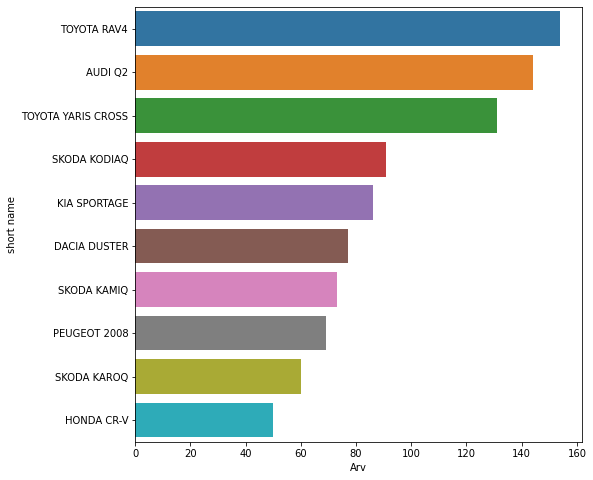

In [20]:
group_sort_and_plot(df_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Diesel SUV

           short name  Arv
1        SKODA KODIAQ   54
2        DACIA DUSTER   46
3        PEUGEOT 3008   25
4   VOLKSWAGEN TIGUAN   16
5        PEUGEOT 5008   11
6         SKODA KAROQ   10
7    HYUNDAI SANTA FE    8
8        PEUGEOT 2008    5
9             AUDI Q3    5
10            AUDI Q2    5


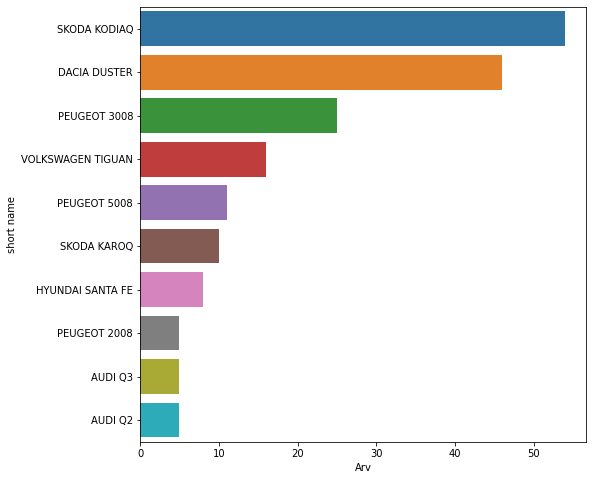

In [21]:
df_diesel_suv = df_diesel[df_diesel['SUV']]

group_sort_and_plot(df_diesel_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Petrol SUV

            short name  Arv
1              AUDI Q2  139
2          SKODA KAMIQ   73
3          TOYOTA RAV4   72
4         PEUGEOT 2008   64
5          SKODA KAROQ   50
6         SKODA KODIAQ   37
7         DACIA DUSTER   31
8   VOLKSWAGEN T-CROSS   22
9     VOLKSWAGEN TAIGO   20
10   VOLKSWAGEN TIGUAN   20


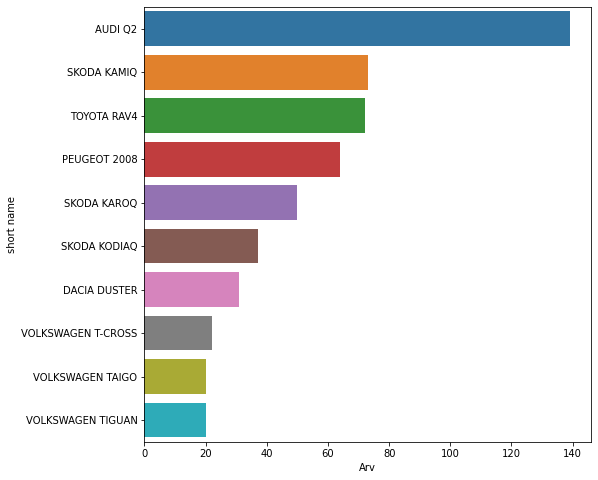

In [22]:
df_petrol_suv = df_petrol[df_petrol['SUV']]

group_sort_and_plot(df_petrol_suv, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid SUV

            short name  Arv
1   TOYOTA YARIS CROSS  122
2          TOYOTA RAV4   82
3         KIA SPORTAGE   66
4           HONDA CR-V   50
5          TOYOTA C-HR   40
6       NISSAN X-TRAIL   32
7              AUDI Q5   31
8           VOLVO XC60   31
9           VOLVO XC90   30
10      HYUNDAI TUCSON   26


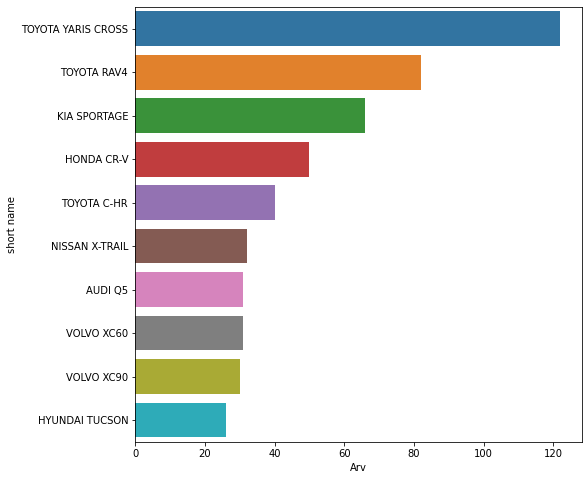

In [23]:
df_hybrid_suv = df_hybrids[df_hybrids['SUV']]

group_sort_and_plot(df_hybrid_suv, [COLUMN_SHORT_NAME])

### Most popular models per city

In [24]:
# Popular car per each city
cities = sorted(df[COLUMN_CITY].unique())

for city in sorted(cities):
    print()
    print(city)
    group_sort_and_plot(df[df[COLUMN_CITY] == city], [COLUMN_SHORT_NAME], limit=3, plot=False)


Haapsalu
     short name  Arv
1  KIA SPORTAGE    2
2  HYUNDAI I 10    1
3   SKODA KAMIQ    1

Keila
       short name  Arv
1    SKODA KODIAQ    2
2   SKODA OCTAVIA    2
3  SUBARU OUTBACK    2

Kohtla-Järve
     short name  Arv
1  KIA SPORTAGE    3
2  SKODA KODIAQ    3
3       AUDI Q5    1

Maardu
           short name  Arv
1  TOYOTA YARIS CROSS    3
2      TOYOTA COROLLA    3
3         TOYOTA RAV4    2

Määramata
       short name  Arv
1  TOYOTA COROLLA   78
2   SKODA OCTAVIA   64
3     TOYOTA RAV4   56

Narva
     short name  Arv
1  KIA SPORTAGE    6
2   TOYOTA RAV4    4
3  DACIA DUSTER    4

Narva-Jõesuu
       short name  Arv
1  TOYOTA COROLLA    2
2         AUDI Q3    1
3        LEXUS NX    1

Paide
         short name  Arv
1  VOLKSWAGEN CADDY    4
2            BMW X6    2
3    TOYOTA COROLLA    2

Pärnu
           short name  Arv
1          SUZUKI SX4   32
2         TOYOTA RAV4    5
3  TOYOTA YARIS CROSS    4

Rakvere
       short name  Arv
1        KIA CEED    5
2   SKODA OCTAVI

# Top 3 for each mark

In [25]:
df_group = group_and_sort(df, ['Mark'])
marks = df_group.head(20)['Mark'].tolist()
df_group.set_index('Mark', inplace=True)

for mark in marks:
    models = df[df['Mark'] == mark]
    count = df_group.loc[mark, 'Arv']
    print(f"{mark} total: {count}")
    if not models.empty:
        print(f"Top 3 {mark} models")
        group_sort_and_plot(models, [COLUMN_SHORT_NAME], limit=3, plot=False)
        print()

TOYOTA total: 617
Top 3 TOYOTA models
           short name  Arv
1      TOYOTA COROLLA  181
2         TOYOTA RAV4  154
3  TOYOTA YARIS CROSS  131

SKODA total: 494
Top 3 SKODA models
      short name  Arv
1  SKODA OCTAVIA  165
2   SKODA KODIAQ   91
3    SKODA KAMIQ   73

AUDI total: 474
Top 3 AUDI models
  short name  Arv
1    AUDI Q2  144
2    AUDI A4  103
3    AUDI A5   99

KIA total: 249
Top 3 KIA models
     short name  Arv
1  KIA SPORTAGE   86
2      KIA CEED   63
3   KIA PROCEED   31

PEUGEOT total: 170
Top 3 PEUGEOT models
     short name  Arv
1  PEUGEOT 2008   69
2   PEUGEOT 208   40
3  PEUGEOT 3008   27

VOLKSWAGEN total: 158
Top 3 VOLKSWAGEN models
           short name  Arv
1   VOLKSWAGEN TIGUAN   40
2  VOLKSWAGEN T-CROSS   22
3    VOLKSWAGEN TAIGO   20

MERCEDES-BENZ total: 141
Top 3 MERCEDES-BENZ models
               short name  Arv
1  MERCEDES-BENZ V-KLASSE   27
2       MERCEDES-BENZ GLE   25
3       MERCEDES-BENZ GLS   15

DACIA total: 139
Top 3 DACIA models
      short